**Churn Analysis**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%cd C:\Users\ratho\Desktop\SunbaseData assignement

C:\Users\ratho\Desktop\SunbaseData assignement


In [3]:
telco_base_data = pd.read_csv('customer_churn_large_dataset.csv')

In [4]:
telco_base_data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [5]:
telco_base_data.shape

(100000, 9)

In [6]:
telco_base_data.columns.values

array(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'], dtype=object)

In [7]:
telco_base_data.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [8]:
telco_base_data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


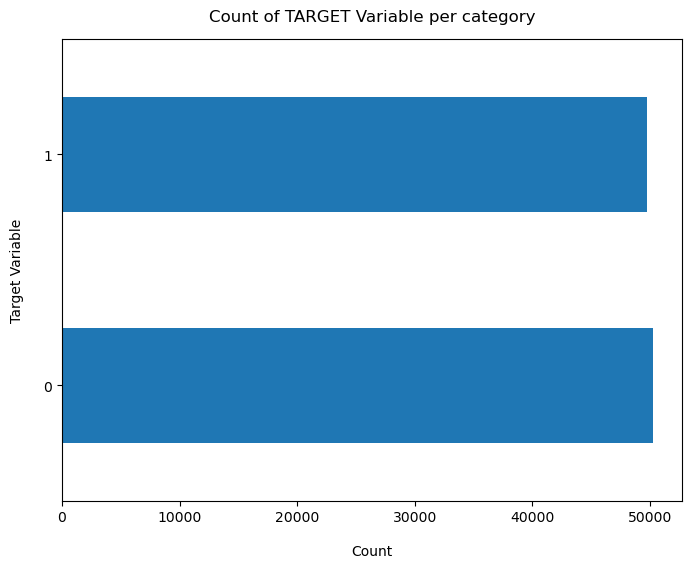

In [9]:
telco_base_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [10]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

0    50.221
1    49.779
Name: Churn, dtype: float64

In [11]:
telco_base_data['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [12]:
telco_base_data.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


**Data Cleaning**

In [14]:
telco_data = telco_base_data.copy()

In [15]:
telco_data.Total_Usage_GB = pd.to_numeric(telco_data.Total_Usage_GB, errors='coerce')
telco_data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [16]:
print(telco_data['Subscription_Length_Months'].max())

24


In [17]:
labels = ["{0} - {1}".format(i, i + 5) for i in range(1, 25, 6)]

# Create the 'tenure_group' column with 6-month bins
telco_data['tenure_group'] = pd.cut(telco_data.Subscription_Length_Months, range(1, 31, 6), right=False, labels=labels)

In [18]:
telco_data['tenure_group'].value_counts()

1 - 6      25064
19 - 24    25026
7 - 12     24957
13 - 18    24953
Name: tenure_group, dtype: int64

In [19]:
labels = ["18 - 45", "46 - 70"]

telco_data['age_group'] = pd.cut(telco_data.Age, bins=[18, 46, 70], right=False, labels=labels)

In [20]:
telco_data['age_group'].value_counts()

18 - 45    52762
46 - 70    45317
Name: age_group, dtype: int64

In [21]:
telco_data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,tenure_group,age_group
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,13 - 18,46 - 70
1,2,Customer_2,62,Female,New York,1,48.76,172,0,1 - 6,46 - 70
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,1 - 6,18 - 45
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,1 - 6,18 - 45
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,19 - 24,46 - 70


**Data Exploration**

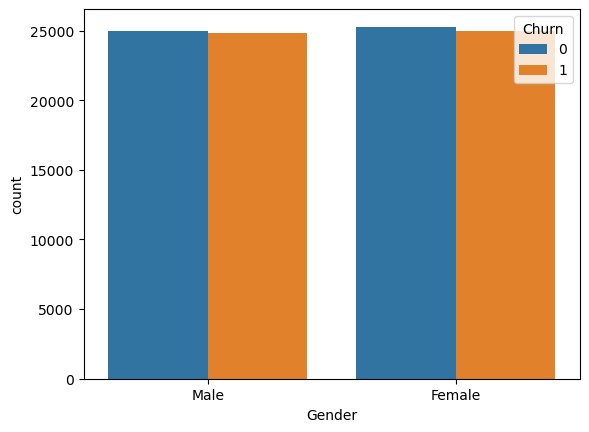

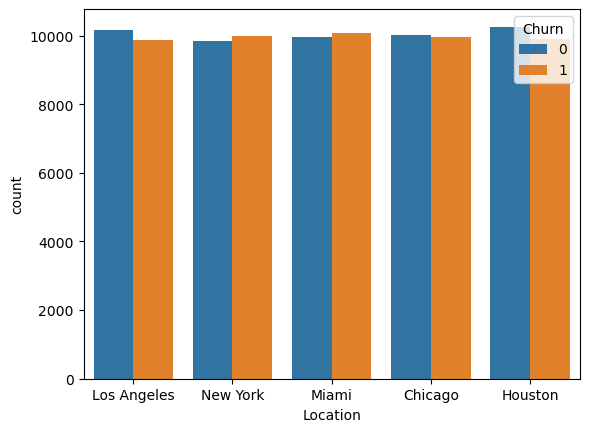

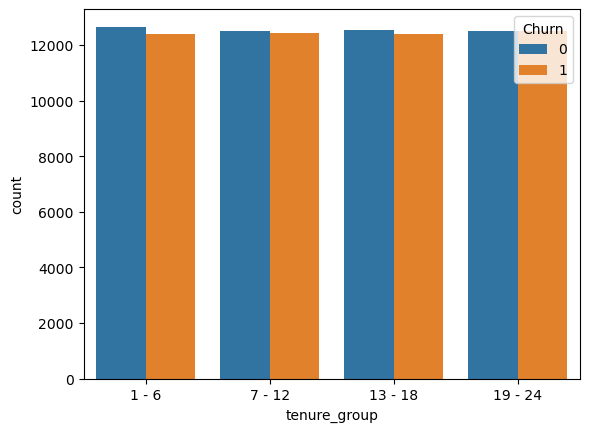

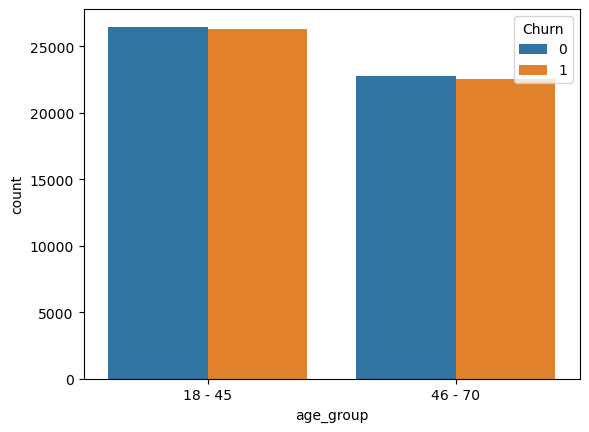

In [22]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'Total_Usage_GB', 'Monthly_Bill', 'Age', 'CustomerID', 'Name', 'Subscription_Length_Months'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

In [35]:
telco_data_dummies = pd.get_dummies(telco_data, sparse=True)
telco_data_dummies.head()

,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,tenure_group_1 - 6,tenure_group_7 - 12,tenure_group_13 - 18,tenure_group_19 - 24,age_group_18 - 45,age_group_46 - 70
0,17,73.36,236,0,0,1,0,0,1,0,0,0,0,1,0,0,1
1,1,48.76,172,0,1,0,0,0,0,0,1,1,0,0,0,0,1
2,5,85.47,460,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,3,97.94,297,1,1,0,0,0,0,1,0,1,0,0,0,1,0
4,19,58.14,266,0,1,0,0,0,0,1,0,0,0,0,1,0,1


In [24]:
telco_data.shape

(100000, 11)

In [ ]:
#drop columns CustomerID and Name
telco_data.drop(columns= ['CustomerID','Name',], axis=1, inplace=True)
telco_data.head()

In [38]:
#drop columns Age
telco_data.drop(columns= ['Age'], axis=1, inplace=True)
telco_data.head()

#drop columns Subscription_Length_Months
telco_data.drop(columns= ['Subscription_Length_Months'], axis=1, inplace=True)
telco_data.head()

,Gender,Location,Monthly_Bill,Total_Usage_GB,Churn,tenure_group,age_group
0,Male,Los Angeles,73.36,236,0,13 - 18,46 - 70
1,Female,New York,48.76,172,0,1 - 6,46 - 70
2,Female,Los Angeles,85.47,460,0,1 - 6,18 - 45
3,Female,Miami,97.94,297,1,1 - 6,18 - 45
4,Female,Miami,58.14,266,0,19 - 24,46 - 70


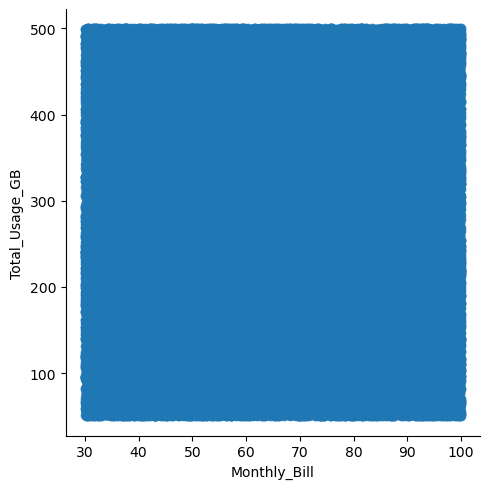

In [34]:
sns.lmplot(data=telco_data_dummies, x='Monthly_Bill', y='Total_Usage_GB', fit_reg=False)

Text(0.5, 1.0, 'Monthly_Bill by churn')

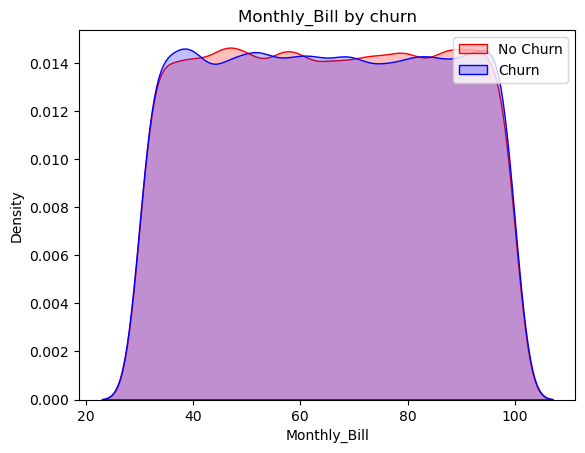

In [40]:
Mth = sns.kdeplot(telco_data_dummies.Monthly_Bill[(telco_data_dummies["Churn"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(telco_data_dummies.Monthly_Bill[(telco_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly_Bill')
Mth.set_title('Monthly_Bill by churn')

Text(0.5, 1.0, 'Total_Usage_GB by churn')

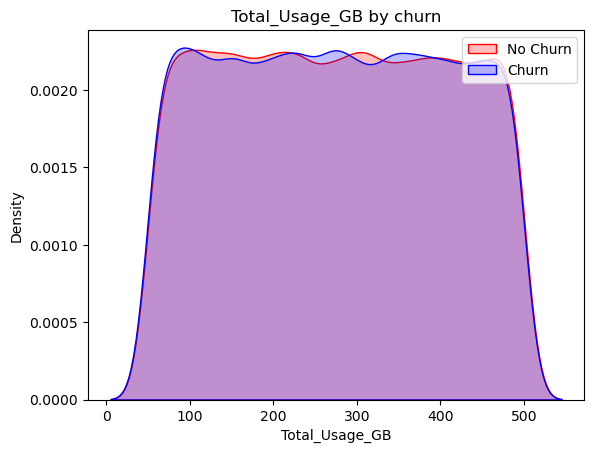

In [42]:
Tot = sns.kdeplot(telco_data_dummies.Total_Usage_GB[(telco_data_dummies["Churn"] == 0) ],
                color="Red", fill = True)
Tot = sns.kdeplot(telco_data_dummies.Total_Usage_GB[(telco_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", fill= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total_Usage_GB')
Tot.set_title('Total_Usage_GB by churn')

<Axes: >

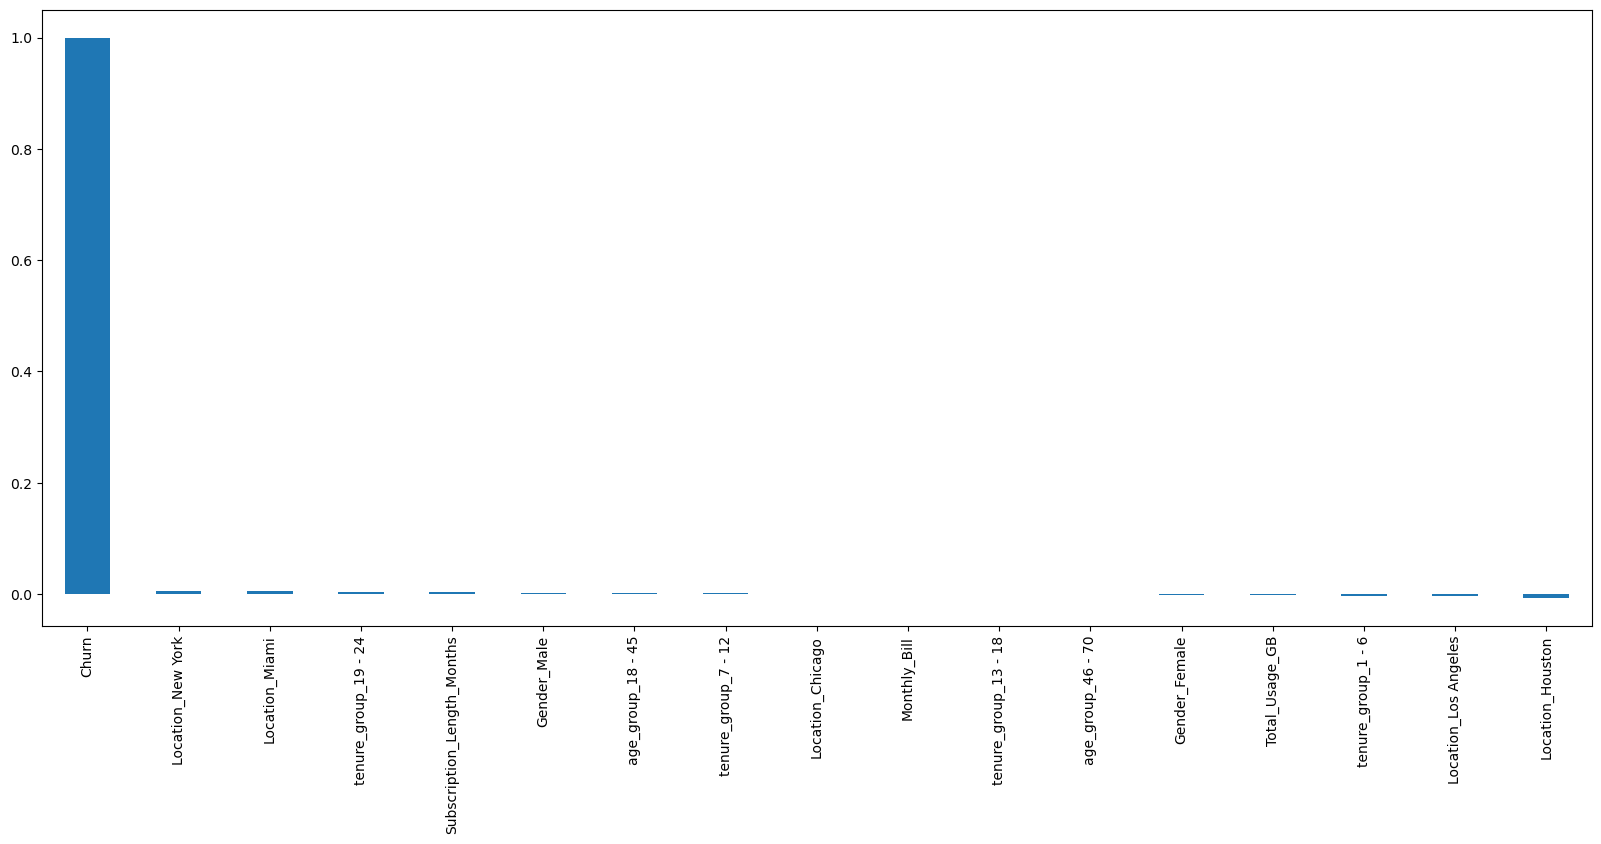

In [43]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

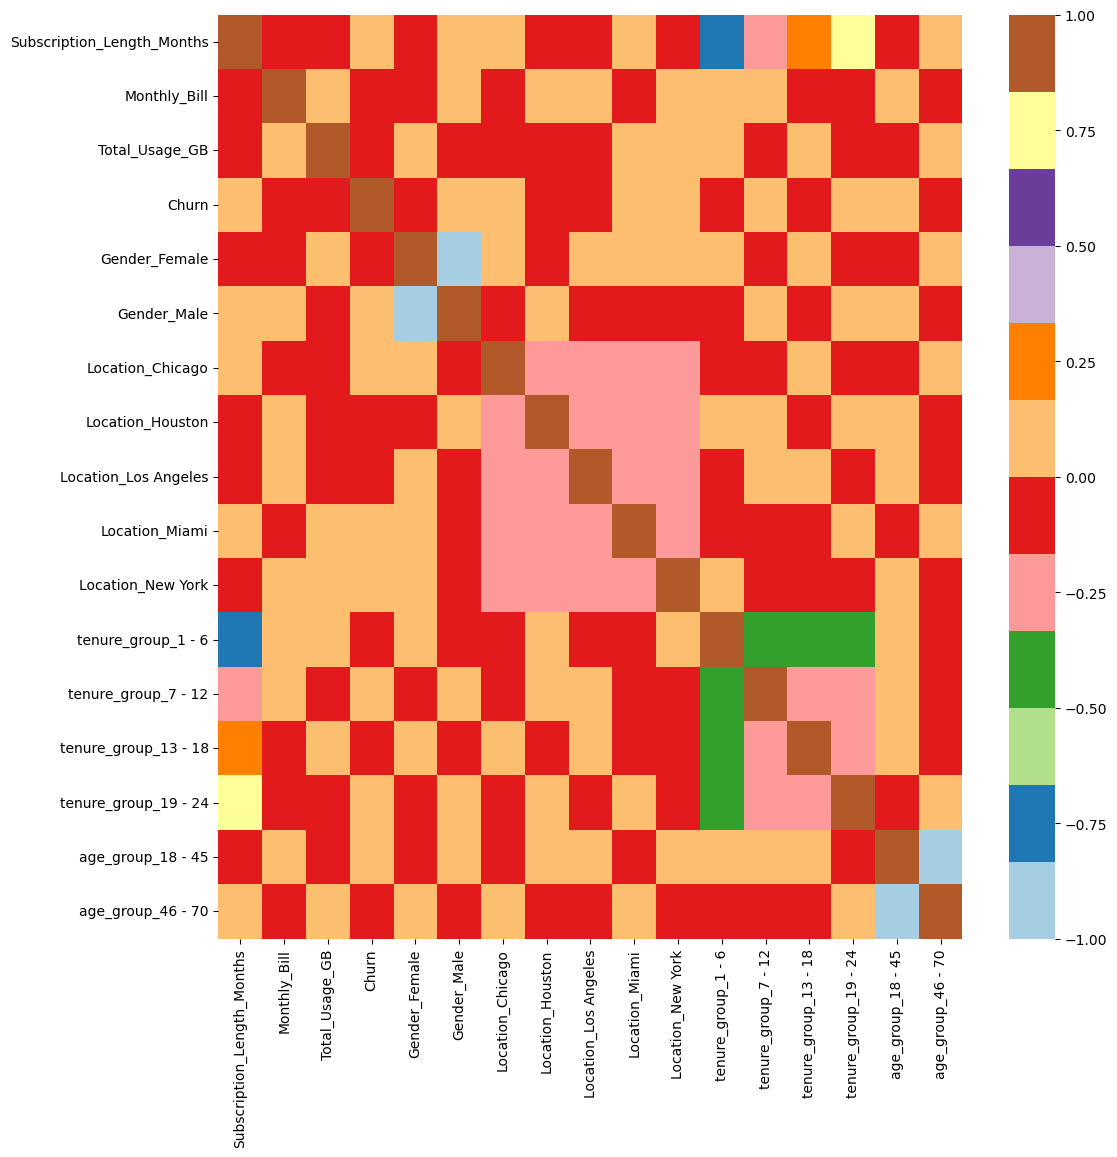

In [44]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

In [45]:
new_df1_target0=telco_data.loc[telco_data["Churn"]==0]
new_df1_target1=telco_data.loc[telco_data["Churn"]==1]

In [46]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

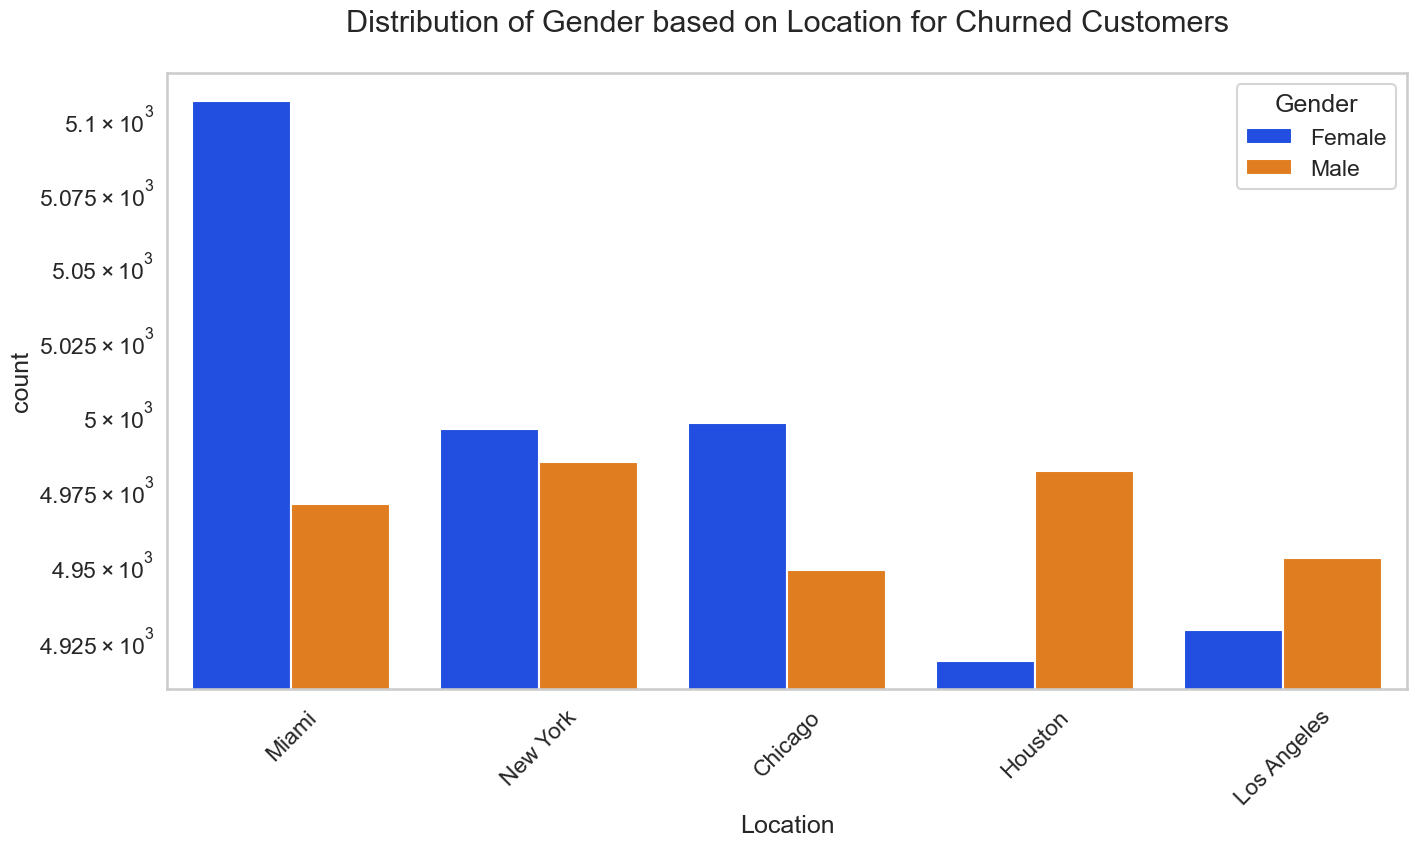

In [49]:
uniplot(new_df1_target1,col='Location',title='Distribution of Gender based on Location for Churned Customers',hue='Gender')

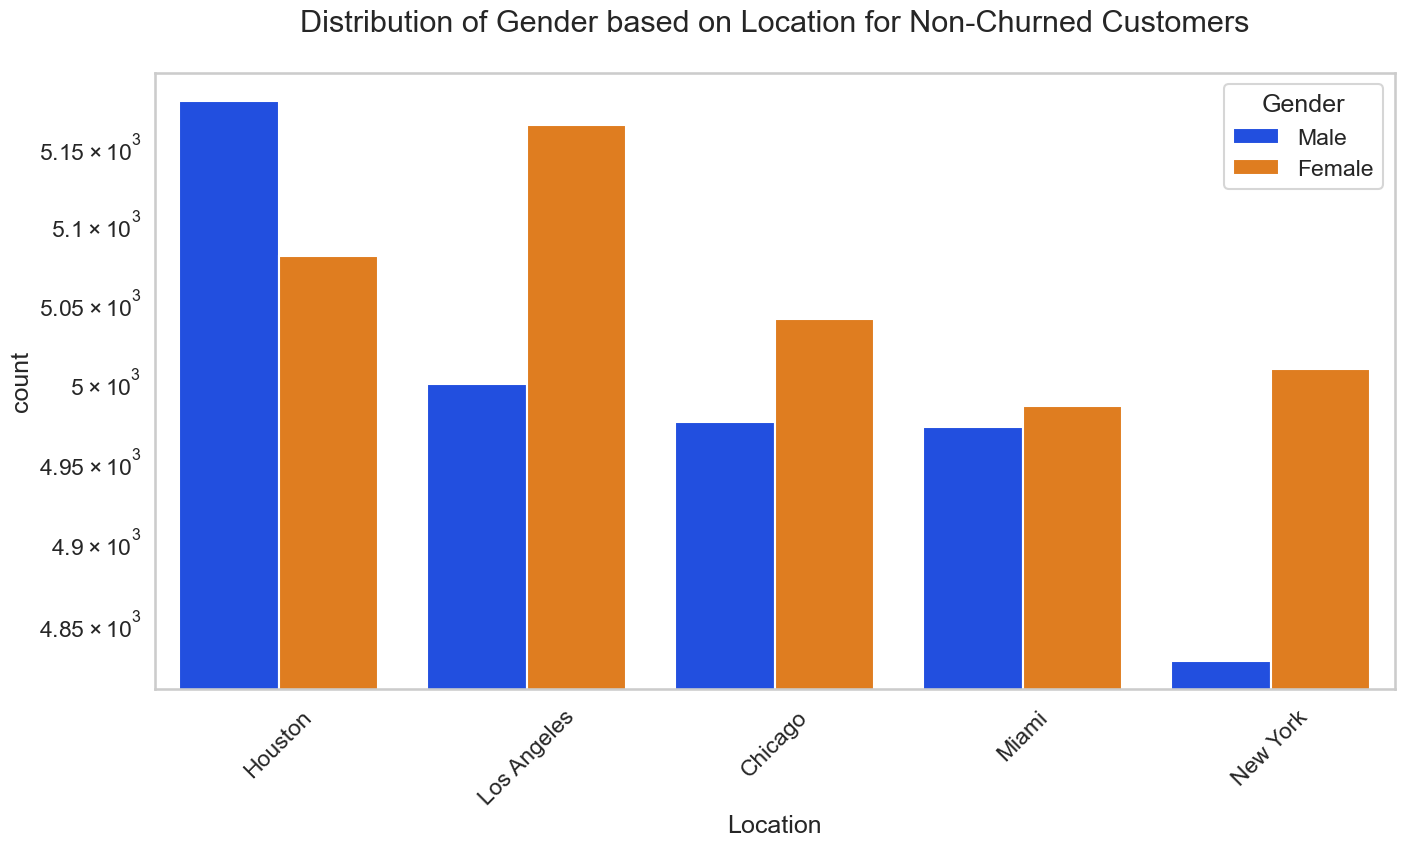

In [51]:
uniplot(new_df1_target0,col='Location',title='Distribution of Gender based on Location for Non-Churned Customers',hue='Gender')

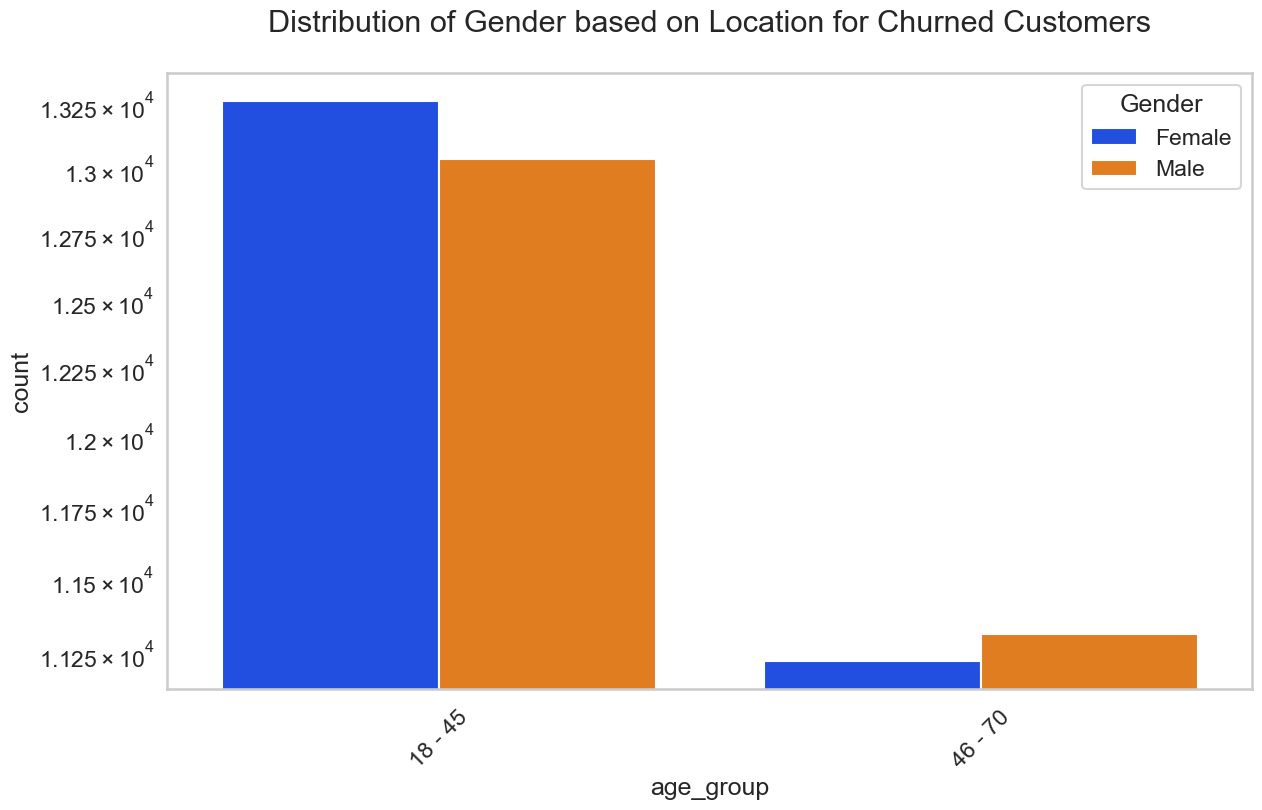

In [52]:
uniplot(new_df1_target1,col='age_group',title='Distribution of Gender based on Location for Churned Customers',hue='Gender')

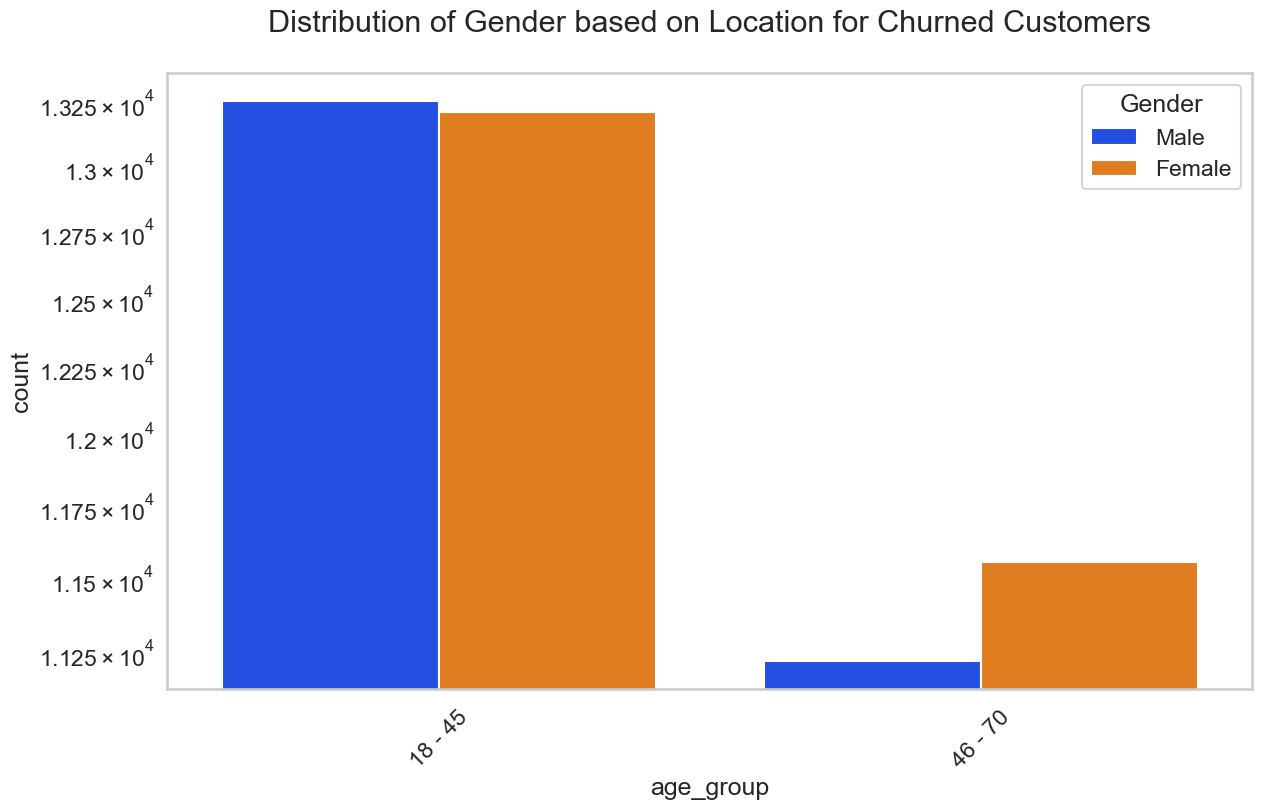

In [53]:
uniplot(new_df1_target0,col='age_group',title='Distribution of Gender based on Location for Churned Customers',hue='Gender')

In [58]:
telco_data_dummies.to_csv('telco_churn.csv')

C:\Users\ratho\AppData\Local\Temp\ipykernel_19452\2611723833.py:1: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  telco_data_dummies.to_csv('telco_churn.csv')
